# Data Project AJ Wilson
## CPSC222 Fall 2021

The data I am analyzing in this project is the nutrition information for each meal I ate this summer. I will be researching it to better understand my habits and try to optimize 

### Prepare the Data

In [1]:
import pandas as pd
nutrition_df = pd.read_csv("nutrition.csv")
gym_df = pd.read_csv("gym_checkin.csv")
dow_df = pd.read_csv("days_of_week_9-20-20_9-20-21.csv")
weight_df = pd.read_csv('weight.csv')

Using the pandas library, I loaded in a csv containing the nutrition information from myFitnessPal, an app that logs your meals. I also loaded a csv of my check-in history for my local gym and the csv containing the dates and days of the week from DA3. The nutrition dataframe contains all the macronutrient contents of the four meals: Breakfast, Lunch, Dinner, and Snack I ate. A few of the various attributes I decided to disregard were the different types of fat, cholesterol, sodium, fiber, and vitamin and mineral intakes. The attributes I decided to keep and mine were Calories, Fat, Carbohydrate, Sugar, and Protein. I believe that these are the most likely to ...

In [2]:
#print(nutrition_df.columns)
nutrition_df.drop(labels=['Note', 'Saturated Fat', 'Polyunsaturated Fat',
       'Monounsaturated Fat', 'Trans Fat', 'Cholesterol',
       'Potassium', 'Vitamin A', 'Vitamin C', 'Calcium', 'Iron', 'Fiber'], axis='columns', inplace=True)
print(nutrition_df)

          Date       Meal  Calories  Fat (g)  Sodium (mg)  Carbohydrates (g)  \
0    5/12/2021  Breakfast    1148.8     50.8        650.8               87.4   
1    5/12/2021      Lunch      32.5      0.0        130.0               13.0   
2    5/12/2021     Dinner    1210.0     74.0       3495.0               78.0   
3    5/12/2021     Snacks     580.0      4.5        310.0               85.5   
4    5/19/2021  Breakfast     440.0     12.0       1000.0               58.0   
..         ...        ...       ...      ...          ...                ...   
248  8/18/2021     Dinner     146.7      1.3        100.0                0.0   
249  8/18/2021     Snacks     480.0      6.5       1570.0               57.0   
250  8/19/2021  Breakfast     160.0      3.0        210.0                5.0   
251  8/19/2021      Lunch     990.0     49.0       1980.0               78.0   
252  8/19/2021     Snacks    1335.0     34.0       2445.0              169.5   

     Sugar  Protein (g)  
0     58.0   

In [3]:
#print(dow_df)
print("Gym checkin in dates:", gym_df['Date'].values[0:10])
print("Days of the week dates:", dow_df['Date'].values[5:15])

Gym checkin in dates: ['05/07/21' '05/08/21' '05/09/21' '05/10/21' '05/11/21' '05/12/21'
 '05/13/21' '05/14/21' '05/15/21' '05/16/21']
Days of the week dates: ['9/25/20' '9/26/20' '9/27/20' '9/28/20' '9/29/20' '9/30/20' '10/1/20'
 '10/2/20' '10/3/20' '10/4/20']


The console output shows that the dates in the gym check-in dataframe are formatted differently than those in the days of the week dataframe. I have to fix that in order to merge them properly. In the code below, I iterate through the date values in the gym check-in dataframe and update the ones with improper formatting.

In [4]:
ser = []
for date in gym_df['Date'].values:
    date = date[1:]
    if(date[2]=='0'):
        date = date[0:2]+date[3:]
    #print(date)
    ser.append(date)
ser = pd.Series(ser) 
gym_df['Date'] = ser
print("Gym checkin in dates:", gym_df['Date'].values)
# #print(gym_df)

Gym checkin in dates: ['5/7/21' '5/8/21' '5/9/21' '5/10/21' '5/11/21' '5/12/21' '5/13/21'
 '5/14/21' '5/15/21' '5/16/21' '5/17/21' '5/18/21' '5/19/21' '5/20/21'
 '5/21/21' '5/22/21' '5/23/21' '5/24/21' '5/25/21' '5/26/21' '5/27/21'
 '5/28/21' '5/29/21' '5/30/21' '5/31/21' '6/1/21' '6/2/21' '6/3/21'
 '6/4/21' '6/5/21' '6/6/21' '6/7/21' '6/8/21' '6/9/21' '6/10/21' '6/11/21'
 '6/12/21' '6/13/21' '6/14/21' '6/15/21' '6/16/21' '6/17/21' '6/18/21'
 '6/19/21' '6/20/21' '6/21/21' '6/22/21' '6/23/21' '6/24/21' '6/25/21'
 '6/26/21' '6/27/21' '6/28/21' '6/29/21' '6/30/21' '7/1/21' '7/2/21'
 '7/3/21' '7/4/21' '7/5/21' '7/6/21' '7/7/21' '7/8/21' '7/9/21' '7/10/21'
 '7/11/21' '7/12/21' '7/13/21' '7/14/21' '7/15/21' '7/16/21' '7/17/21'
 '7/18/21' '7/19/21' '7/20/21' '7/21/21' '7/22/21' '7/23/21' '7/24/21'
 '7/25/21' '7/26/21' '7/27/21' '7/28/21' '7/29/21' '7/30/21' '7/31/21'
 '8/1/21' '8/2/21' '8/3/21' '8/4/21' '8/5/21' '8/6/21' '8/7/21' '8/8/21'
 '8/9/21' '8/10/21' '8/11/21' '8/12/21' '8/13/21' '8/1

After formatting the dates, I am able to merge the dataframes into a single dataframe. I used groupby to gather each day's total macronutrient intake from the nutrition dataframe. I completed an inner merge between my gym checkin and day of week dataframes on the 'Date' column. I outer merged that dataframe with the weights and interpolated my missing weight values.  I then outer merged my merged_df with my nutrition dataframe and filled the missing nutrition values with zeros.

In [5]:
nutrition_df['Date'] = pd.to_datetime(nutrition_df['Date']) #convert to datetime
daily_totals = nutrition_df.sort_values('Date').groupby('Date').sum()


weight_df['Date'] = pd.to_datetime(weight_df['Date'])
weight_df.set_index("Date",inplace=True)
#print(weight_df)

merged_df = pd.merge(gym_df, dow_df, on='Date')
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df = merged_df.merge(weight_df, how='outer', on='Date')
merged_df = merged_df.interpolate()
merged_df = merged_df.dropna()
#print(merged_df.values)

#print(daily_totals)
#print(average_meal)

data = merged_df.merge(daily_totals, on='Date', how="outer")
data.set_index("Date",inplace=True)
na_df = data.copy() #saves a df with na instead of zero for consistency comparison
data.fillna(0, inplace=True)
# data.to_csv("cleaned.csv")
#print(data)

### Data Analysis

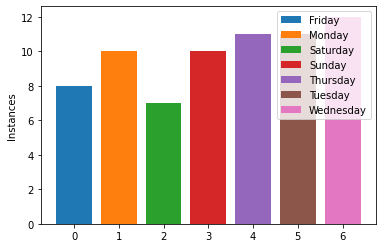

In [6]:
import matplotlib.pyplot as plt
d = (na_df.groupby('Day of Week').count()['Calories'])
# d.plot(kind='bar')
for i in range(d.size):
    plt.bar(i, d.iloc[i], label=d.index[i])
    plt.ylabel('Instances')
plt.legend()

My eating data is not complete. There are missing days when I did not log what I ate. I am unable to account for these missing values because the pandas methods to fill missing values (interpolate, backfill, etc..) would not accurately depict how I ate on these days. On the days I did not track what I ate I would make poorer food decisions and eat well above my calorie goal and fail to meet my protein goals. However, I could not account for this without making up the missing values so I set them to zeros. The graph above is the number of occurances of each day of the week in my data set. With this visualization I am able to see which day I most frequently failed to log my food intake. Saturday was the least frequent day I completed my food log, followed closely by Friday. This is likely because on these days I was more likely to fall off my diet.

<AxesSubplot:xlabel='Date'>

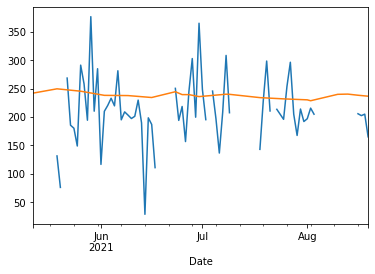

In [7]:
na_df['Protein (g)'].plot()
#na_df['Carbohydrates (g)'].plot()
data['Weight'].plot()

This visualization shows that my weight increases during time periods without Protein data. This would imply I am gaining weight when I am not tracking my food and being concious about what I eat.

In [8]:
import scipy.stats as stats
m, b, r, p_val, std_err = stats.linregress(data['Calories'], data['Weight'])
print(r)

-0.13666494838425736


You would expect a positive correlation between calories and weight. However, because I replaced missing values in the nutrition dataframe with zeros my weight increased when calories were lower creating a negative correation. This makes sense because when I was not tracking I was more likely to indulge myself and eat in a manner that resulted in me gaining weight. 

In [9]:
average_meal = nutrition_df.sort_values('Date').groupby('Meal').mean()
print(average_meal)

             Calories    Fat (g)  Sodium (mg)  Carbohydrates (g)      Sugar  \
Meal                                                                          
Breakfast  490.551515  15.192424   839.503030          47.128788  15.533333   
Dinner     816.167797  37.871186  1770.037288          58.576271   9.905085   
Lunch      952.782353  38.386765  2434.892647          82.336765  19.647059   
Snacks     560.725000  12.610000   750.978333          56.495000  29.383333   

           Protein (g)  
Meal                    
Breakfast    41.827273  
Dinner       61.186441  
Lunch        68.160294  
Snacks       56.390000  


In [10]:
mealby = nutrition_df.sort_values('Date').groupby('Meal')
breakfast_df = mealby.get_group('Breakfast')
lunch_df = mealby.get_group('Lunch')
dinner_df = mealby.get_group('Dinner')
snacks_df = mealby.get_group('Snacks')

### Hypothesis Testing
* $H_{0}$: significant difference of $\alpha$ <= 0.1
* $H_{1}$: significant difference of $\alpha$ > 0.1

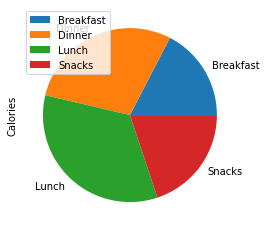

In [11]:
average_meal['Calories'].plot(kind='pie')
plt.legend()

In [12]:
t, p = stats.ttest_ind(lunch_df['Calories'], dinner_df['Calories'])
print(p)

0.07642123125792454


This is signicant!

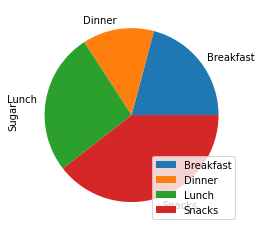

In [13]:
average_meal['Sugar'].plot(kind='pie')
plt.legend()

In [14]:
t,p = stats.ttest_ind(snacks_df['Sugar'], lunch_df['Sugar'])
print(p)

0.08051455670614704


This is significant!

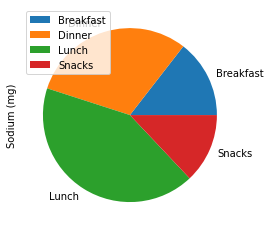

In [15]:
average_meal['Sodium (mg)'].plot(kind='pie')
plt.legend()

In [16]:
t,p = stats.ttest_ind(lunch_df['Sodium (mg)'], dinner_df['Sodium (mg)'])
print(p)

0.010937771202004428


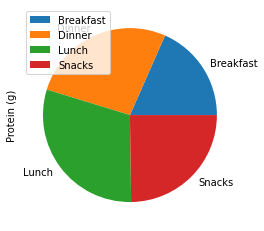

In [17]:
average_meal['Protein (g)'].plot(kind='pie')
plt.legend()

In [18]:
t,p = stats.ttest_ind(lunch_df['Protein (g)'], dinner_df['Protein (g)'])
print(p)

0.2161080924600675


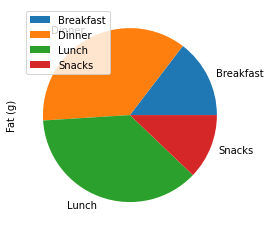

In [19]:
average_meal['Fat (g)'].plot(kind='pie')
plt.legend()

In [20]:
t,p = stats.ttest_ind(dinner_df['Fat (g)'], lunch_df['Fat (g)'])
print(p)

0.9021247988738681


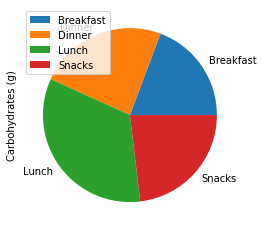

In [21]:
average_meal['Carbohydrates (g)'].plot(kind='pie')
plt.legend()

In [22]:
t,p = stats.ttest_ind(lunch_df['Carbohydrates (g)'], dinner_df['Carbohydrates (g)'])
print(p)

0.0030639470843715198


This is significant!

### kNN Classification
I am using kNN classification to try to predict which meal it was based on the nutritional information of the meal. My hypothesis is that kNN will not be successful at predicting the meal attribute because only half of my attributes were significantly more prevelant in one meal than another. My breakfast, lunch, and dinner are similar in macronutrient content so the algorithm will likely have trouble correctly classifying them.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('nutrition.csv')
df.drop(columns=['Date', 'Note'], axis=1, inplace=True) #drop attributes that cannot be normalized
X = df.drop(columns='Meal', axis=1).astype(object)
y = df['Meal']
#print(X, y)
        
scaler= MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,stratify=y)

knn_clf = KNeighborsClassifier(n_neighbors=7, metric="euclidean")
knn_clf.fit(X_train,y_train)
y_predicted = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted)

#print(y_predicted)
print("kNN:", accuracy)

    Calories Fat (g) Saturated Fat Polyunsaturated Fat Monounsaturated Fat  \
0     1148.8    50.8          19.7                 3.8                 7.3   
1       32.5     0.0           0.0                 0.0                 0.0   
2     1210.0    74.0          14.5                 0.0                 0.0   
3      580.0     4.5           2.2                 0.5                 0.4   
4      440.0    12.0           5.0                 0.0                 0.0   
..       ...     ...           ...                 ...                 ...   
248    146.7     1.3           0.0                 0.0                 0.0   
249    480.0     6.5           4.0                 0.0                 1.0   
250    160.0     3.0           1.0                 0.0                 0.0   
251    990.0    49.0          13.5                 0.0                 0.0   
252   1335.0    34.0          12.0                 0.0                 0.0   

    Trans Fat Cholesterol Sodium (mg) Potassium Carbohydrates (

In [24]:
from sklearn import tree
# print(df)
decision_tree = tree.DecisionTreeClassifier(max_depth = 5)
decision_tree.fit(df.drop(["Meal"],axis=1).values, df["Meal"])
y_predicted = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_predicted)
print("decision tree:", accuracy)

decision tree: 0.265625


## Sources
* https://pandas.pydata.org/docs/index.html
* https://matplotlib.org/stable/index.html